# Phishing URL (Website) Prediction (Phase 1)

## Table of Contents :
* Introduction
* Goal Of the Project
* Data Story
* Data Preprocessing
 

#### Introducion

Phishing attacks have become a major cybersecurity threat, tricking users into revealing sensitive information by mimicking legitimate websites. Detecting phishing URLs is crucial in preventing fraud and enhancing online security. This project, Phishing URL (Website) Prediction, aims to analyze various website features—such as URL structure, security attributes, and content properties—to build a model that can accurately distinguish between legitimate and phishing websites. By leveraging machine learning and data-driven insights, the project seeks to develop an efficient and automated detection system to mitigate cyber risks.

#### Goal of the project

* Develop a machine learning-based model to accurately detect and predict phishing websites by analyzing URL and website features, enhancing online security.

#### Data Story

In the digital world, phishing attacks exploit unsuspecting users by creating deceptive websites that mimic legitimate ones. The challenge lies in distinguishing between real and fraudulent sites based on various characteristics.

Our dataset comprises multiple website features, including URL structure, security indicators (HTTPS, domain-title match), and content properties (number of scripts, external links, social network links). Through exploratory data analysis, we uncover key patterns—such as phishing websites often having more special characters in URLs, fewer security features, and certain predictable behaviors in their structure.

By leveraging machine learning, we aim to transform these insights into a predictive model that can effectively flag phishing URLs in real time, offering a proactive defense against cyber threats. This project bridges data-driven decision-making with cybersecurity to create a safer browsing environment.

#### Data preprocessing

## Libraries

In [278]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif
from kneed import KneeLocator
from collections import Counter

In [3]:
# fetch dataset 
phiusiil_phishing_url_website = fetch_ucirepo(id=967) 
  
# data (as pandas dataframes) 
X = phiusiil_phishing_url_website.data.features 
y = phiusiil_phishing_url_website.data.targets 
  
# metadata 
# print(phiusiil_phishing_url_website.metadata) 
  
# variable information 
print(phiusiil_phishing_url_website.variables) 


                          name     role         type demographic description  \
0                     FILENAME    Other  Categorical        None        None   
1                          URL  Feature  Categorical        None        None   
2                    URLLength  Feature      Integer        None        None   
3                       Domain  Feature  Categorical        None        None   
4                 DomainLength  Feature      Integer        None        None   
5                   IsDomainIP  Feature      Integer        None        None   
6                          TLD  Feature  Categorical        None        None   
7           URLSimilarityIndex  Feature      Integer        None        None   
8         CharContinuationRate  Feature      Integer        None        None   
9            TLDLegitimateProb  Feature   Continuous        None        None   
10                 URLCharProb  Feature   Continuous        None        None   
11                   TLDLength  Feature 

In [21]:
X.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,1,0,0,1,34,20,28,119,0,124
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,0,1,50,9,8,39,0,217
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,0,1,10,2,7,42,2,5
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,0,1,1,1,3,27,15,22,1,31
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,1,0,1,244,15,34,72,1,85


In [5]:
X.shape

(235795, 54)

In [7]:
y.shape

(235795, 1)

In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235795 entries, 0 to 235794
Data columns (total 54 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   URL                         235795 non-null  object 
 1   URLLength                   235795 non-null  int64  
 2   Domain                      235795 non-null  object 
 3   DomainLength                235795 non-null  int64  
 4   IsDomainIP                  235795 non-null  int64  
 5   TLD                         235795 non-null  object 
 6   URLSimilarityIndex          235795 non-null  float64
 7   CharContinuationRate        235795 non-null  float64
 8   TLDLegitimateProb           235795 non-null  float64
 9   URLCharProb                 235795 non-null  float64
 10  TLDLength                   235795 non-null  int64  
 11  NoOfSubDomain               235795 non-null  int64  
 12  HasObfuscation              235795 non-null  int64  
 13  NoOfObfuscated

In [11]:
X.describe()

,URLLength,DomainLength,IsDomainIP,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,HasObfuscation,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
count,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,...,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000,235795.000000
mean,34.573095,21.470396,0.002706,78.430778,0.845508,0.260423,0.055747,2.764456,1.164758,0.002057,...,0.127089,0.237007,0.023474,0.486775,26.075689,6.333111,10.522305,65.071113,2.377629,49.262516
std,41.314153,9.150793,0.051946,28.976055,0.216632,0.251628,0.010587,0.599739,0.600969,0.045306,...,0.333074,0.425247,0.151403,0.499826,79.411815,74.866296,22.312192,176.687539,17.641097,161.027430
min,13.000000,4.000000,0.000000,0.155574,0.000000,0.000000,0.001083,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,16.000000,0.000000,57.024793,0.680000,0.005977,0.050747,2.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,27.000000,20.000000,0.000000,100.000000,1.000000,0.079963,0.057970,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,2.000000,6.000000,12.000000,0.000000,10.000000
75%,34.000000,24.000000,0.000000,100.000000,1.000000,0.522907,0.062875,3.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,29.000000,8.000000,15.000000,88.000000,1.000000,57.000000
max,6097.000000,110.000000,1.000000,100.000000,1.000000,0.522907,0.090824,13.000000,10.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,8956.000000,35820.000000,6957.000000,27397.000000,4887.000000,27516.000000


In [13]:
X.isnull().sum()

URL                           0
URLLength                     0
Domain                        0
DomainLength                  0
IsDomainIP                    0
TLD                           0
URLSimilarityIndex            0
CharContinuationRate          0
TLDLegitimateProb             0
URLCharProb                   0
TLDLength                     0
NoOfSubDomain                 0
HasObfuscation                0
NoOfObfuscatedChar            0
ObfuscationRatio              0
NoOfLettersInURL              0
LetterRatioInURL              0
NoOfDegitsInURL               0
DegitRatioInURL               0
NoOfEqualsInURL               0
NoOfQMarkInURL                0
NoOfAmpersandInURL            0
NoOfOtherSpecialCharsInURL    0
SpacialCharRatioInURL         0
IsHTTPS                       0
LineOfCode                    0
LargestLineLength             0
HasTitle                      0
Title                         0
DomainTitleMatchScore         0
URLTitleMatchScore            0
HasFavic

In [15]:
y.isnull().sum()

label    0
dtype: int64

In [17]:
X.duplicated().sum()

0

In [19]:
# check for imbalance in target variable

# Check class distribution
print(y.value_counts())

# Check class distribution in percentage
print(y.value_counts(normalize=True) * 100)

label
1        134850
0        100945
Name: count, dtype: int64
label
1        57.189508
0        42.810492
Name: proportion, dtype: float64


In [280]:

y = [1] * 134850 + [0] * 100945  # Simulated target data

# Count occurrences of each class
class_counts = Counter(y)
majority_class = max(class_counts.values())
minority_class = min(class_counts.values())

# Compute imbalance ratio
imbalance_ratio = majority_class / minority_class

print(f"Class Counts: {class_counts}")
print(f"Imbalance Ratio: {imbalance_ratio:.2f}")


Class Counts: Counter({1: 134850, 0: 100945})
Imbalance Ratio: 1.34


* An imbalance ratio of 1.34 is relatively low, meaning the dataset is not severely imbalanced.

#### Drop columns (eye ball check)

In [57]:
X.drop(columns=['URL', 'Domain', 'Title', 'LineOfCode', 'LargestLineLength'], inplace=True)

C:\Users\jayak\AppData\Local\Temp\ipykernel_26052\431138070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=['URL', 'Domain', 'Title', 'LineOfCode', 'LargestLineLength'], inplace=True)


* URL & Domain & Title (Raw text fields, can be dropped unless NLP is used)
* LineOfCode & LargestLineLength (Could be useful but might not be highly relevant)


In [59]:
X.shape

(235795, 49)

#### Encoding TLD feature

In [61]:
le = LabelEncoder()

# Apply Label Encoding to 'TLD' column
X['TLD'] = le.fit_transform(X['TLD'])

C:\Users\jayak\AppData\Local\Temp\ipykernel_26052\290807289.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['TLD'] = le.fit_transform(X['TLD'])


In [63]:
X.head()

,URLLength,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,TLDLength,NoOfSubDomain,...,Bank,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef
0,31,24,0,231,100.0,1.000000,0.522907,0.061933,3,1,...,1,0,0,1,34,20,28,119,0,124
1,23,16,0,254,100.0,0.666667,0.032650,0.050207,2,1,...,0,0,0,1,50,9,8,39,0,217
2,29,22,0,647,100.0,0.866667,0.028555,0.064129,2,2,...,0,0,0,1,10,2,7,42,2,5
3,26,19,0,231,100.0,1.000000,0.522907,0.057606,3,1,...,0,1,1,1,3,27,15,22,1,31
4,33,26,0,503,100.0,1.000000,0.079963,0.059441,3,1,...,1,1,0,1,244,15,34,72,1,85


#### Skewness and outliers

In [65]:
X.skew().sort_values(ascending=True)
# Skewness value before outlier removal

HasTitle                       -2.090195
IsHTTPS                        -1.370443
CharContinuationRate           -1.128591
URLCharProb                    -1.064291
URLSimilarityIndex             -0.989903
IsResponsive                   -0.514255
URLTitleMatchScore             -0.089085
LetterRatioInURL               -0.066358
DomainTitleMatchScore          -0.008735
HasCopyrightInfo                0.052921
TLDLegitimateProb               0.073090
HasSocialNet                    0.174379
HasDescription                  0.241000
HasSubmitButton                 0.347949
HasHiddenFields                 0.504096
HasFavicon                      0.575358
TLD                             0.988938
Robots                          1.056024
SpacialCharRatioInURL           1.184134
Pay                             1.236906
TLDLength                       1.663518
NoOfSubDomain                   1.809400
NoOfURLRedirect                 2.155960
Bank                            2.239229
DomainLength    

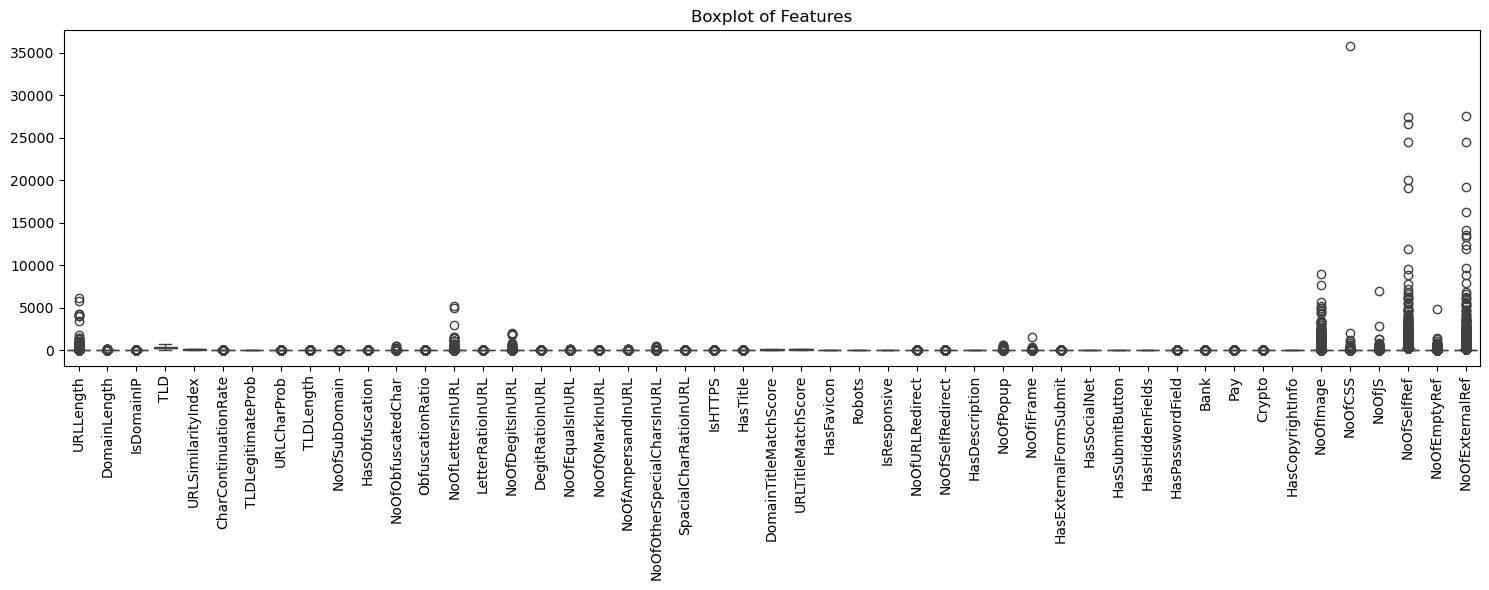

In [67]:
# Boxplot for outlier detection
plt.figure(figsize=(15, 6))
sns.boxplot(data=X)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Boxplot of Features before IQR")

plt.tight_layout()  
plt.show()

In [71]:
df_feature = X.copy()

In [77]:
# #IQR method for outlier removal
def remove_outliers(df_feature,columns):
  data_filtered=df_feature.copy()

  for column in columns:
     Q1 = df_feature[column].quantile(0.25)
     Q3 = df_feature[column].quantile(0.75)
     IQR = Q3 - Q1

     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5* IQR

     data_filtered = data_filtered[(data_filtered[column] >= lower_bound) & (data_filtered[column] <= upper_bound)]

  return data_filtered

In [83]:
new_data=remove_outliers(df_feature,['NoOfCSS','NoOfExternalRef','NoOfEmptyRef','NoOfSelfRef','NoOfJS','NoOfImage'])

In [85]:
new_data.skew().sort_values(ascending=True)
# skewness value after outlier removal

HasTitle                       -1.520405
URLCharProb                    -0.919138
CharContinuationRate           -0.838686
IsHTTPS                        -0.834112
URLSimilarityIndex             -0.477957
LetterRatioInURL               -0.177236
IsResponsive                   -0.041171
TLDLegitimateProb               0.137536
URLTitleMatchScore              0.281080
DomainTitleMatchScore           0.396266
HasCopyrightInfo                0.689526
HasDescription                  0.793256
SpacialCharRatioInURL           0.918380
HasSocialNet                    0.922282
TLD                             0.974674
HasSubmitButton                 1.025691
HasFavicon                      1.034111
HasHiddenFields                 1.147718
NoOfJS                          1.668233
NoOfSubDomain                   1.688728
Robots                          1.706578
TLDLength                       1.838909
Pay                             1.901831
NoOfImage                       1.908651
NoOfSelfRef     

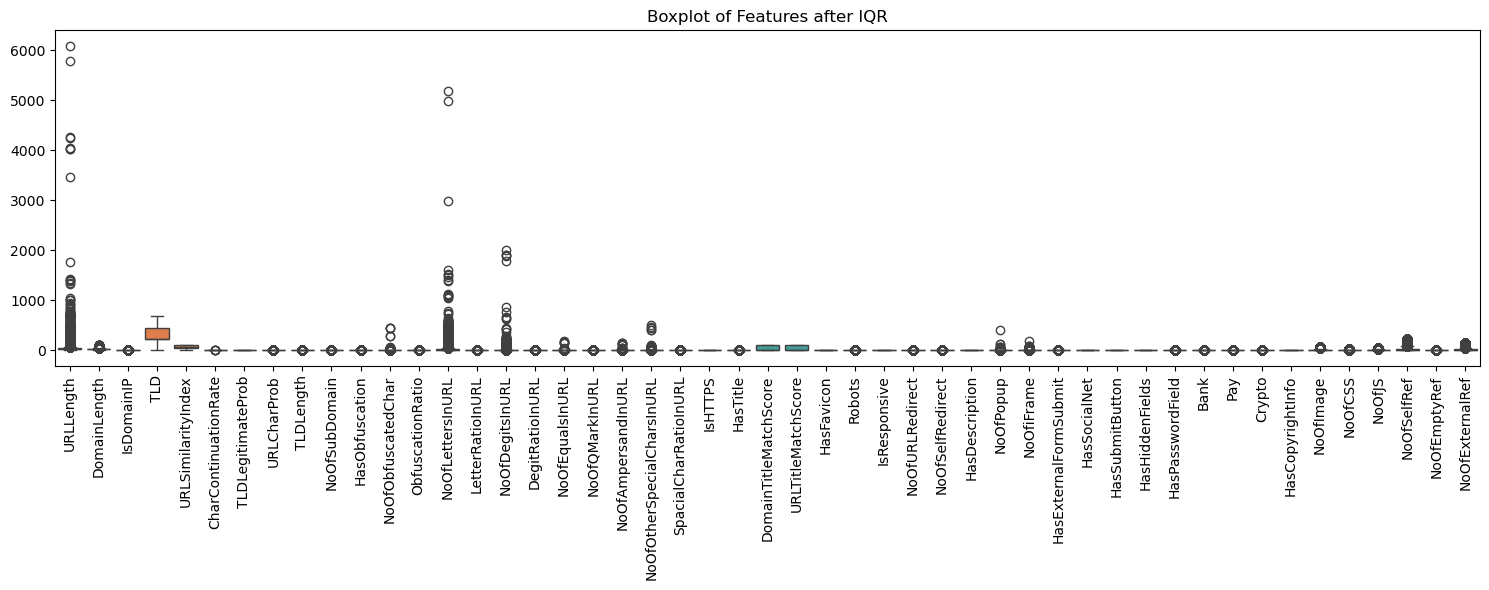

In [95]:
# Boxplot after outlier removal 
plt.figure(figsize=(15, 6))
sns.boxplot(data=new_data)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title("Boxplot of Features after IQR")

plt.tight_layout()  
plt.show()

In [89]:
new_data.shape


(164957, 49)

In [91]:
X.shape

(235795, 49)

In [97]:
df_feature.shape

(235795, 49)

* (≈28.2%) were dropped

#### Power Transformation

In [244]:
df2 = X.copy(deep=True)
print(type(df2))  # Should be <class 'pandas.core.frame.DataFrame'>
print(df2.dtypes)


<class 'pandas.core.frame.DataFrame'>
URLLength                       int64
DomainLength                    int64
IsDomainIP                      int64
TLD                             int32
URLSimilarityIndex            float64
CharContinuationRate          float64
TLDLegitimateProb             float64
URLCharProb                   float64
TLDLength                       int64
NoOfSubDomain                   int64
HasObfuscation                  int64
NoOfObfuscatedChar              int64
ObfuscationRatio              float64
NoOfLettersInURL                int64
LetterRatioInURL              float64
NoOfDegitsInURL                 int64
DegitRatioInURL               float64
NoOfEqualsInURL                 int64
NoOfQMarkInURL                  int64
NoOfAmpersandInURL              int64
NoOfOtherSpecialCharsInURL      int64
SpacialCharRatioInURL         float64
IsHTTPS                         int64
HasTitle                        int64
DomainTitleMatchScore         float64
URLTitleMatc

In [246]:
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
import numpy as np

# Identify numerical columns
num_cols = df2.select_dtypes(include=['number']).columns.tolist()

# Calculate skewness
skewness = df2[num_cols].skew()

# Initialize Yeo-Johnson transformer
pt = PowerTransformer(method='yeo-johnson', standardize=False)

for col in num_cols:
    if skewness[col] > 2:  # Extremely high positive skew → Apply Box-Cox (if positive) or Yeo-Johnson
        if (df2[col] <= 0).any():  # Ensure Box-Cox condition
            df2[col] += abs(df2[col].min()) + 1  
            df2[col] = pt.fit_transform(df2[[col]]).flatten()  # Use Yeo-Johnson as a fallback
        else:
            df2[col], _ = boxcox(df2[col])  # Use Box-Cox if all positive

    elif 1 < skewness[col] <= 2:  # Highly positive skew → Use Yeo-Johnson
        df2[col] = pt.fit_transform(df2[[col]]).flatten()

    elif -2 < skewness[col] < -1:  # Highly negative skew → Use Yeo-Johnson
        df2[col] = pt.fit_transform(df2[[col]]).flatten()

    elif 0.5 < skewness[col] <= 1 or -1 <= skewness[col] < -0.5:  # Moderately skewed → Log transformation
        if (df2[col] <= 0).any():  # Ensure log validity
            df2[col] += abs(df2[col].min()) + 1  
        df2[col] = np.log(df2[col])

#  Recalculate skewness after transformations
final_skewness = df2[num_cols].skew()

#  Identify features still having extreme skewness
high_skew_cols = final_skewness[abs(final_skewness) > 1].index.tolist()

#  Reapply Yeo-Johnson to features still highly skewed
if high_skew_cols:
    df2[high_skew_cols] = pt.fit_transform(df2[high_skew_cols])

#  Print skewness before & after
print("Initial Skewness:\n", skewness)
print("\nFinal Skewness:\n", df2[num_cols].skew())


Initial Skewness:
 URLLength                      53.321737
DomainLength                    2.513397
IsDomainIP                     19.146593
TLD                             0.988938
URLSimilarityIndex             -0.989903
CharContinuationRate           -1.128591
TLDLegitimateProb               0.073090
URLCharProb                    -1.064291
TLDLength                       1.663518
NoOfSubDomain                   1.809400
HasObfuscation                 21.981435
NoOfObfuscatedChar            204.684335
ObfuscationRatio               40.118612
NoOfLettersInURL               58.402581
LetterRatioInURL               -0.066358
NoOfDegitsInURL                94.877574
DegitRatioInURL                 3.244523
NoOfEqualsInURL               114.985479
NoOfQMarkInURL                  8.160618
NoOfAmpersandInURL            106.717256
NoOfOtherSpecialCharsInURL     47.428522
SpacialCharRatioInURL           1.184134
IsHTTPS                        -1.370443
HasTitle                       -2.0901

 a few highly skewed features still remain:

* HasTitle (-2.090195) → Still highly negatively skewed

* ISHTTPS (-1.370443) → Strong negative skew

* Robots (1.056242) → Mild positive skew

* Pay (1.236096) → Mild positive skew

### Feature Selection

In [258]:

# Apply ANOVA F-test
select_k = SelectKBest(score_func=f_classif, k='all')  # Compute scores for all features
select_k.fit(df2, y)

# Get feature scores and p-values
scores = select_k.scores_
p_values = select_k.pvalues_

# Create DataFrame of feature scores & p-values
feature_scores_df = pd.DataFrame({'Feature': df2.columns, 'Score': scores, 'p-Value': p_values})

# Select features with p-value < 0.05 (statistically significant)
significant_features = feature_scores_df[feature_scores_df["p-Value"] < 0.05]

# If we have 15 or more significant features, pick the top 15
if len(significant_features) >= 15:
    selected_features = significant_features.nlargest(15, "Score")["Feature"].tolist()
else:
    # If fewer than 15 features pass the p-value threshold, take the top 15 by score
    selected_features = feature_scores_df.nlargest(15, "Score")["Feature"].tolist()

# Sort the selected features by F-score in descending order
feature_scores_df = feature_scores_df[feature_scores_df["Feature"].isin(selected_features)]
feature_scores_df = feature_scores_df.sort_values(by="Score", ascending=False)

# Transform df2 to keep only selected features
df2_selected = df2[selected_features]

# Print results
print(f"Selected {len(selected_features)} features:\n", selected_features)
print("\nFeature Scores:\n", feature_scores_df)


Selected 15 features:
 ['URLSimilarityIndex', 'NoOfSelfRef', 'NoOfExternalRef', 'NoOfImage', 'NoOfJS', 'NoOfCSS', 'HasSocialNet', 'HasCopyrightInfo', 'HasDescription', 'NoOfOtherSpecialCharsInURL', 'IsHTTPS', 'DomainTitleMatchScore', 'HasSubmitButton', 'IsResponsive', 'URLTitleMatchScore']

Feature Scores:
                        Feature         Score  p-Value
4           URLSimilarityIndex  1.055532e+06      0.0
46                 NoOfSelfRef  7.188444e+05      0.0
48             NoOfExternalRef  6.878881e+05      0.0
43                   NoOfImage  6.728718e+05      0.0
45                      NoOfJS  5.657297e+05      0.0
44                     NoOfCSS  4.104904e+05      0.0
35                HasSocialNet  3.767441e+05      0.0
42            HasCopyrightInfo  2.912134e+05      0.0
31              HasDescription  2.145545e+05      0.0
20  NoOfOtherSpecialCharsInURL  1.442493e+05      0.0
22                     IsHTTPS  1.391015e+05      0.0
24       DomainTitleMatchScore  1.226168e+0

C:\Users\jayak\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## EDA 

#### 1. Univariate Analysis

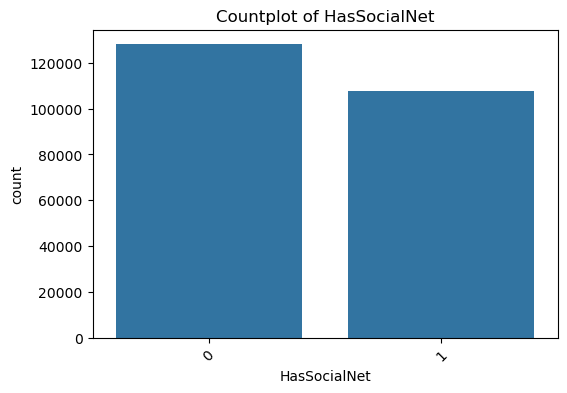

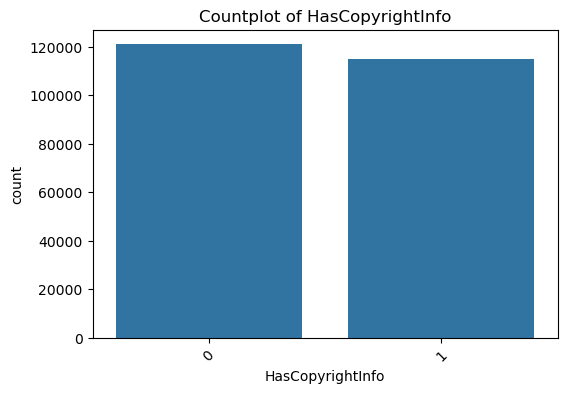

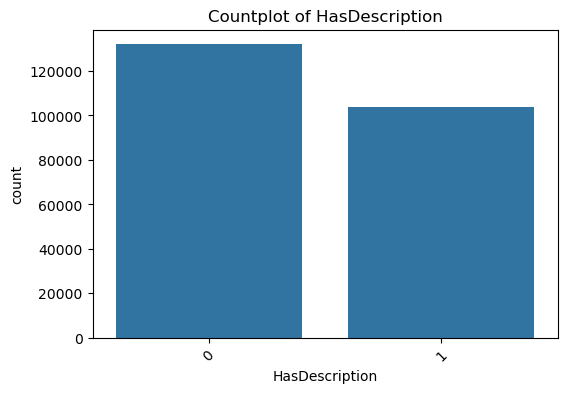

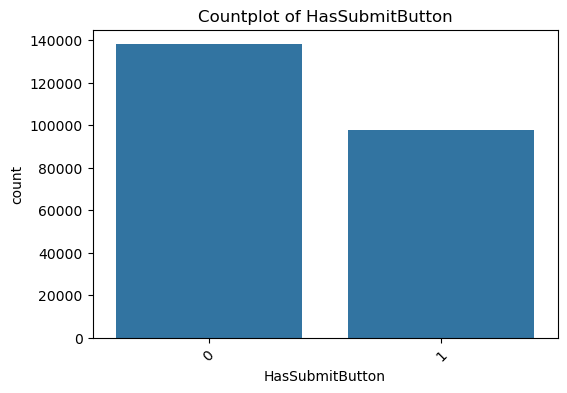

In [299]:
for col in df2_selected.select_dtypes(include=['int64', 'object']).columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=df2_selected[col])
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.show()


#### Bivariate Analysis (Two Variables)

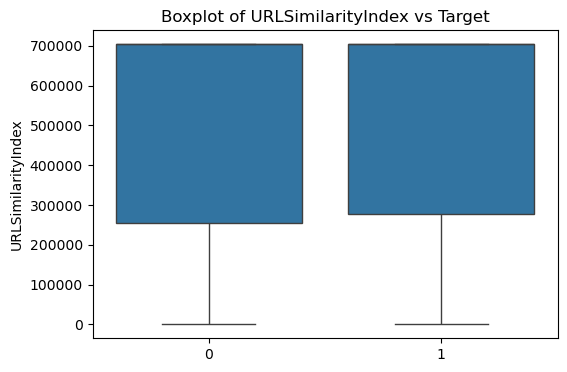

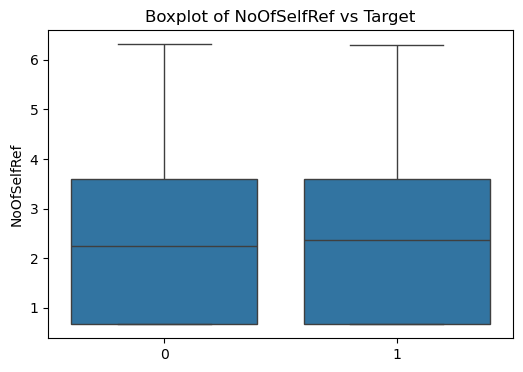

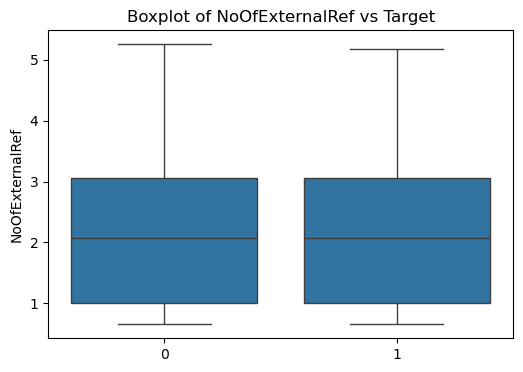

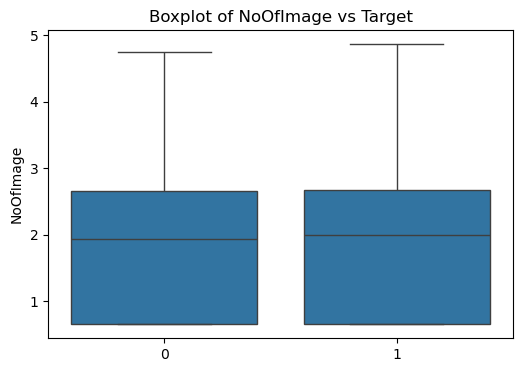

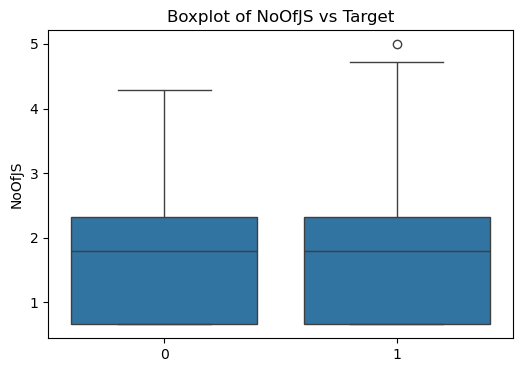

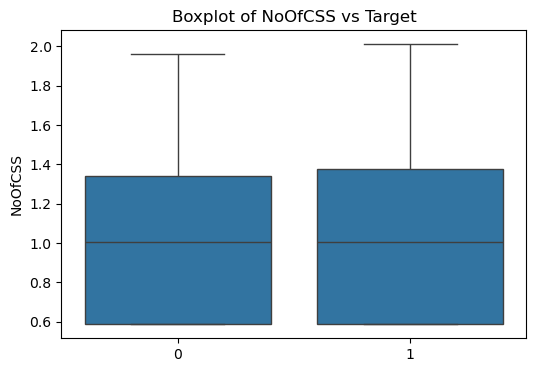

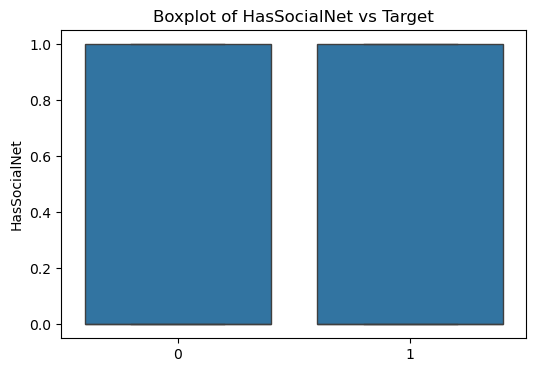

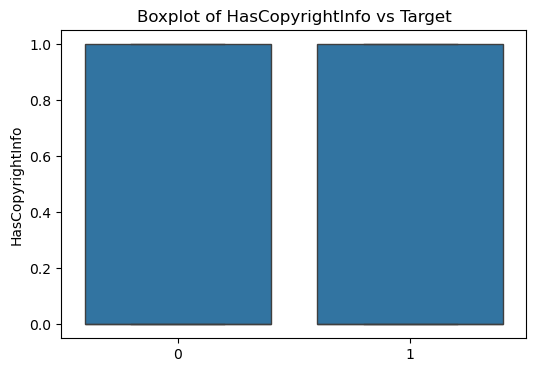

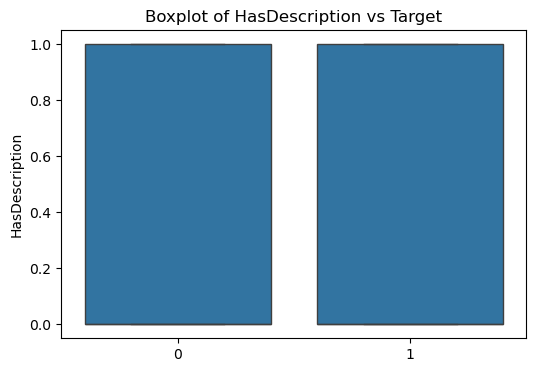

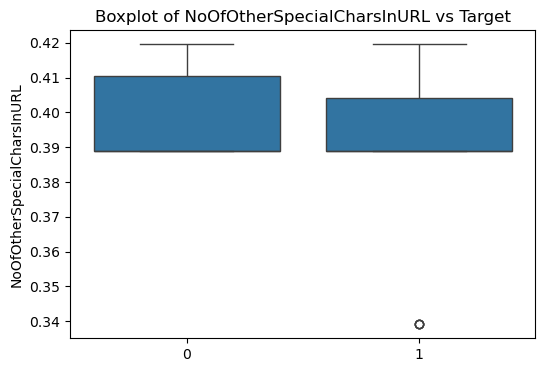

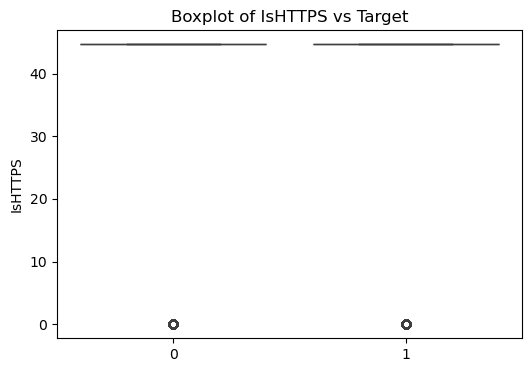

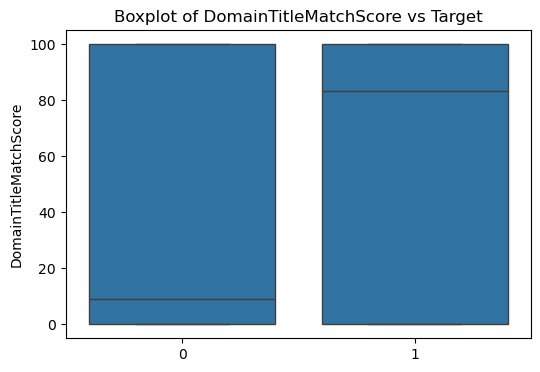

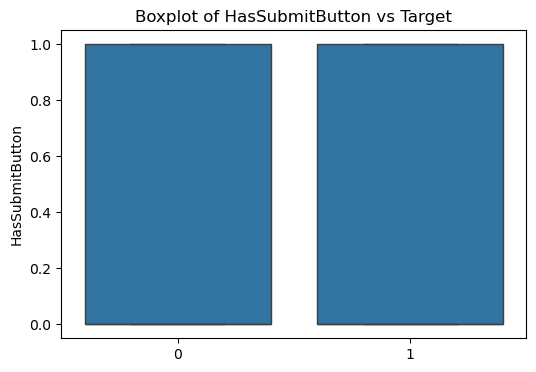

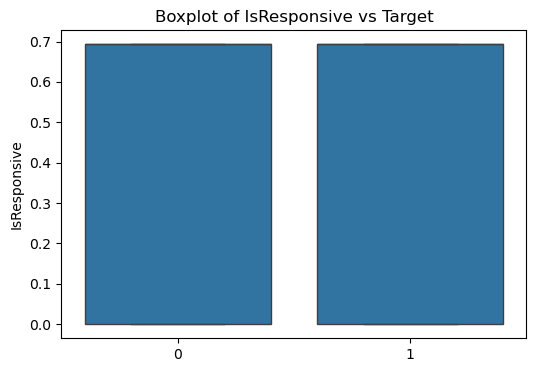

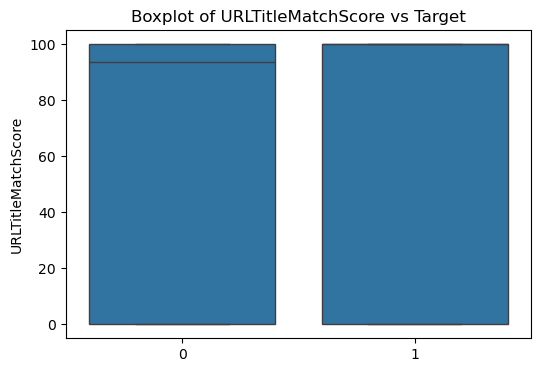

In [302]:
for col in selected_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y, y=df2_selected[col])
    plt.title(f'Boxplot of {col} vs Target')
    plt.show()


#### Multivariate Analysis (More Than Two Variables)

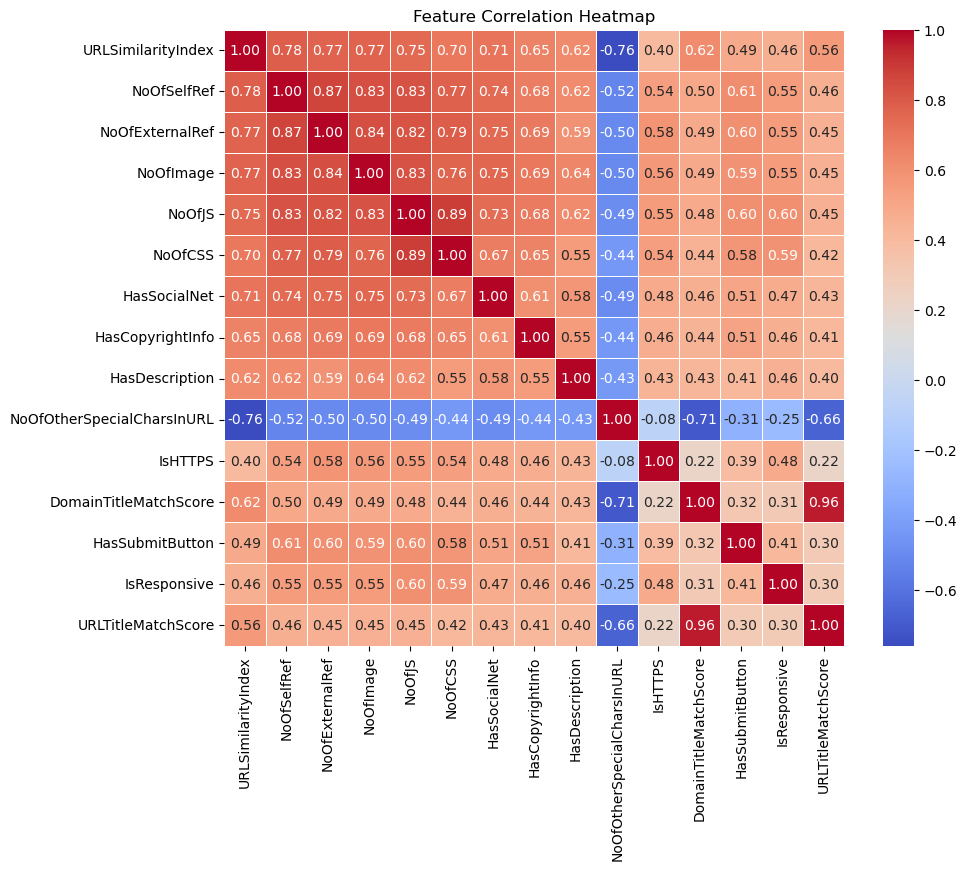

In [305]:

plt.figure(figsize=(10, 8))
corr_matrix = df2_selected.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


1. Strong Positive Correlations (Highly Related Features)
* URLSimilarityIndex vs NoOfSelfRef (0.78) and NoOfExternalRef (0.79)
   * Websites with high URL similarity tend to have more self-referencing and external links.
* NoOfJS vs NoOfCSS (0.89)
   * Sites using JavaScript also tend to use CSS extensively.
* DomainTitleMatchScore vs URLTitleMatchScore (0.96)
   * Websites where the domain matches the title also tend to have matching URLs and titles.
 
2. Strong Negative Correlations (Inverse Relationships)
* NoOfOtherSpecialCharsInURL vs URLSimilarityIndex (-0.76)
   * URLs with many special characters tend to have lower similarity scores, possibly indicating more complex or dynamically generated URLs.
* NoOfOtherSpecialCharsInURL vs IsHTTPS (-0.71)
   * Websites with more special characters in URLs are less likely to use HTTPS, possibly indicating lower security or phishing attempts.

3. Moderate Correlations with Security & Usability
* IsHTTPS shows weak correlation with other features (~0.22 to 0.56)
    * HTTPS usage does not strongly depend on other features, suggesting it is an independent security choice.
* HasSubmitButton and IsResponsive (0.41)
    * More interactive and responsive sites tend to have submission forms, which makes sense for modern web designs.
